In [4]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import os
from tqdm import tqdm
from PIL import Image
import time 
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
import torchvision.datasets as datasets
from torchmetrics import Accuracy, Precision, Recall, F1Score

In [2]:
class CustomDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.classes = sorted(os.listdir(data_dir))

        self.images = []
        self.labels = []

        for i, class_name in enumerate(self.classes):
            class_dir = os.path.join(data_dir, class_name)
            for image_name in os.listdir(class_dir):
                image_path = os.path.join(class_dir, image_name)
                self.images.append(image_path)
                self.labels.append(i)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = self.images[idx]
        image = Image.open(img_path).convert('RGB')
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label




In [3]:
def create_data_loaders(dataset_path, train_size=0.8, batch_size=32, shuffle=True):
    transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor(),
    ])

    dataset = CustomDataset(dataset_path, transform=transform)

    # Define sizes for train, validation, and test sets
    train_size = int(train_size * len(dataset))
    val_size = (len(dataset) - train_size) // 2
    test_size = len(dataset) - train_size - val_size

    # Split dataset into train, validation, and test sets
    train_data, val_data, test_data = torch.utils.data.random_split(dataset, [train_size, val_size, test_size])

    # Create DataLoader instances for training, validation, and testing
    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=shuffle)
    val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

    return train_loader, val_loader, test_loader


In [4]:
# Define the dataset path
dataset_path = 'C:/Users/Babacar Gaye/Desktop/mes docs babs/mes etudes/ESSAI 2EM ANNE/PFA/Plant_leave_diseases_dataset_with_augmentation'

# Define batch size for DataLoader
batch_size = 32

# Create DataLoader instances for training, validation, and testing
train_loader, val_loader, test_loader = create_data_loaders(dataset_path, batch_size=batch_size)

# Check the lengths of the loaders
print(f"Number of batches in train_loader: {len(train_loader)}")
print(f"Number of batches in val_loader: {len(val_loader)}")
print(f"Number of batches in test_loader: {len(test_loader)}")


Number of batches in train_loader: 1538
Number of batches in val_loader: 193
Number of batches in test_loader: 193


In [6]:

for image, label in test_loader:
    
    min_val = torch.min(image)
    mean_val = torch.mean(image)
    max_val = torch.max(image)
    
    print(min_val.item(), mean_val.item(), max_val.item())
    break


0.0 0.4460986852645874 1.0


In [8]:

class MultiClassCNN(nn.Module):
    def __init__(self):
        super(MultiClassCNN, self).__init__()
        self.conv_block = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(16, 32, kernel_size=3, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.flatten = nn.Flatten()
        self.fc_block = nn.Sequential(
            nn.Linear(32 * 62 * 62, 128),  # Calculated based on the output size after convolutions
            nn.ReLU(),
            nn.Linear(128, 39)  # 39 classes
        ) 

    def forward(self, x):
        x = self.conv_block(x)
        x = self.flatten(x)
        x = self.fc_block(x)
        return x 


In [8]:
model = MultiClassCNN()

# Calcul du nombre total de paramètres
total_params = sum(p.numel() for p in model.parameters())
print(f"Nombre total de paramètres dans le modèle : {total_params}")

Nombre total de paramètres dans le modèle : 15755271


Epoch 1: 100%|█████████████████████████████████████████████████████████████████████| 1538/1538 [39:10<00:00,  1.53s/it]


Epoch 1, Loss: 1.0433
Accuracy: 0.6330, Precision: 0.6609, Recall: 0.6330, F1 Score: 0.6435


Validation: 100%|████████████████████████████████████████████████████████████████████| 193/193 [02:05<00:00,  1.54it/s]


Validation Loss: 0.6175, Validation Accuracy: 0.7738
Time elapsed for epoch 1: 2476.16 seconds


Epoch 2: 100%|█████████████████████████████████████████████████████████████████████| 1538/1538 [45:41<00:00,  1.78s/it]


Epoch 2, Loss: 0.4332
Accuracy: 0.7357, Precision: 0.7539, Recall: 0.7357, F1 Score: 0.7435


Validation: 100%|████████████████████████████████████████████████████████████████████| 193/193 [02:19<00:00,  1.38it/s]


Validation Loss: 0.4808, Validation Accuracy: 0.7990
Time elapsed for epoch 2: 2881.10 seconds


Epoch 3: 100%|█████████████████████████████████████████████████████████████████████| 1538/1538 [44:30<00:00,  1.74s/it]


Epoch 3, Loss: 0.2423
Accuracy: 0.7934, Precision: 0.8076, Recall: 0.7934, F1 Score: 0.7998


Validation: 100%|████████████████████████████████████████████████████████████████████| 193/193 [02:12<00:00,  1.46it/s]


Validation Loss: 0.5235, Validation Accuracy: 0.8040
Time elapsed for epoch 3: 2802.74 seconds


Epoch 4: 100%|█████████████████████████████████████████████████████████████████████| 1538/1538 [45:27<00:00,  1.77s/it]


Epoch 4, Loss: 0.1501
Accuracy: 0.8308, Precision: 0.8425, Recall: 0.8308, F1 Score: 0.8362


Validation: 100%|████████████████████████████████████████████████████████████████████| 193/193 [01:48<00:00,  1.77it/s]


Validation Loss: 0.5169, Validation Accuracy: 0.8118
Time elapsed for epoch 4: 2836.82 seconds


Epoch 5: 100%|█████████████████████████████████████████████████████████████████████| 1538/1538 [40:09<00:00,  1.57s/it]


Epoch 5, Loss: 0.1013
Accuracy: 0.8568, Precision: 0.8668, Recall: 0.8568, F1 Score: 0.8615


Validation: 100%|████████████████████████████████████████████████████████████████████| 193/193 [02:18<00:00,  1.39it/s]


Validation Loss: 0.7009, Validation Accuracy: 0.8125
Time elapsed for epoch 5: 2548.82 seconds


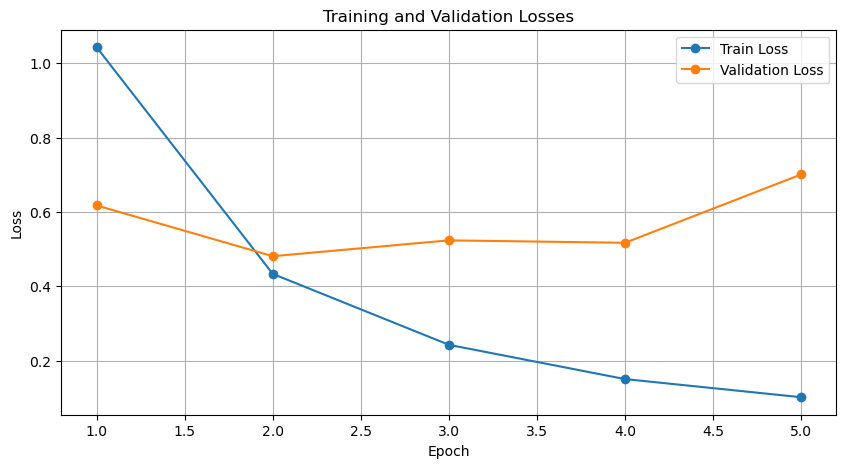

In [16]:

# Definition of loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
# Initialization of metrics
accuracy = Accuracy(task='multiclass', num_classes=39, average='macro')
precision = Precision(task='multiclass', num_classes=39, average='macro')
recall = Recall(task='multiclass', num_classes=39, average='macro')
f1 = F1Score(task='multiclass',num_classes=39, average='macro')
val_accuracy = Accuracy(task='multiclass', num_classes=39, average='macro')  # Initialize validation accuracy outside the loop
epoch_losses= []
val_losses=[]
# Training loop
for epoch in range(5):  # Number of epochs
    start_time = time.time()  # Start time
    
    running_loss = 0.0
    model.train()  # Set model to training mode
    
    for batch_idx, (images, labels) in enumerate(tqdm(train_loader, desc=f"Epoch {epoch+1}")):
            # Reset gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(images)

            # Calculate loss
            loss = criterion(outputs, labels)

            # Backward pass
            loss.backward()

            # Update model parameters
            optimizer.step()

            # Update running loss
            running_loss += loss.item()

            # Update metrics
            accuracy.update(outputs, labels)
            precision.update(outputs, labels)
            recall.update(outputs, labels)
            f1.update(outputs, labels)

    
    # Calculate metrics after each epoch
    epoch_loss = running_loss / len(train_loader)
    epoch_losses.append(epoch_loss)  # Store epoch loss
    acc = accuracy.compute()
    prec = precision.compute()
    rec = recall.compute()
    f1_score = f1.compute()
    
    print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}")
    print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1 Score: {f1_score:.4f}")
    
    # Validation loop
    val_loss = 0.0
    model.eval()  # Set model to evaluation mode
    
    for val_images, val_labels in tqdm(val_loader, desc="Validation"):
        with torch.no_grad():
            val_outputs = model(val_images)
            val_loss += criterion(val_outputs, val_labels).item()
            val_accuracy.update(val_outputs, val_labels)
    val_acc = val_accuracy.compute()
    val_loss /= len(val_loader)
    val_losses.append(val_loss)  # Store validation loss
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")
    
    # Elapsed time
    end_time = time.time()
    epoch_time = end_time - start_time
    print(f"Time elapsed for epoch {epoch+1}: {epoch_time:.2f} seconds")

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(epoch_losses) + 1), epoch_losses, label='Train Loss', marker='o')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.grid(True)
plt.show()



In [17]:

# Initialize metrics
accuracy = Accuracy(task='multiclass',num_classes=39, average='macro')
precision = Precision(task='multiclass',num_classes=39, average=None)
recall = Recall(task='multiclass',num_classes=39, average=None)

# Put the model in evaluation mode
model.eval()

# Iterate over the test data
for images, labels in test_loader:
    # Forward pass to get the predicted labels
    with torch.no_grad():
        outputs = model(images)
    predicted = torch.argmax(outputs, dim=1)
    
    # Update metrics
    accuracy.update(predicted, labels)
    precision.update(predicted, labels)
    recall.update(predicted, labels)

# Compute final values
accuracy = accuracy.compute()
precision = precision.compute()
recall = recall.compute()

# Print accuracy, precision, and recall
print("Accuracy:", accuracy)
print("Per-class Precision:", precision)
print("Per-class Recall:", recall)


Accuracy: tensor(0.8154)
Per-class Precision: tensor([0.6952, 0.7143, 0.9481, 0.6121, 0.8000, 0.8448, 0.9010, 0.9655, 0.7818,
        1.0000, 0.8101, 0.9500, 0.8969, 0.7245, 0.9706, 0.9062, 0.9906, 0.9091,
        0.7030, 0.8750, 0.8803, 0.6875, 0.7923, 0.8539, 0.9136, 0.8554, 0.9641,
        0.7805, 0.8586, 0.9639, 0.6216, 0.7674, 0.4880, 0.7434, 0.8095, 0.8017,
        0.9476, 0.9859, 0.9861])
Per-class Recall: tensor([0.8022, 0.8523, 0.8295, 0.8765, 0.9600, 0.9545, 0.8053, 0.5045, 0.7963,
        0.9677, 0.7273, 0.9913, 0.6960, 0.9793, 0.8839, 0.7838, 0.9777, 0.7727,
        0.9103, 0.4468, 0.7716, 0.9429, 0.8583, 0.7917, 0.7789, 0.9748, 0.9758,
        0.8421, 0.8252, 0.8578, 0.4423, 0.6633, 0.7864, 0.6011, 0.8718, 0.6879,
        0.9693, 0.6931, 0.9467])


In [32]:
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd

# Initialize metrics
metrics = {
    'accuracy': Accuracy(task='multiclass', num_classes=39, average='macro'),
    'precision': Precision(task='multiclass', num_classes=39, average='macro'),
    'recall': Recall(task='multiclass', num_classes=39, average='macro'),
    'F1Score': F1Score(task='multiclass',num_classes=39, average='macro')
}

# Lists to store predicted and true labels
all_predicted = []
all_labels = []

# Put the model in evaluation mode
model.eval()

# Iterate over the test data
for images, labels in test_loader:
    # Forward pass to get the predicted labels
    with torch.no_grad():
        outputs = model(images) 
    predicted = torch.argmax(outputs, dim=1)
    
    # Update metrics
    for metric in metrics.values():
        metric.update(predicted, labels)
    
    # Store predicted and true labels
    all_predicted.extend(predicted.cpu().numpy())
    all_labels.extend(labels.cpu().numpy())

# Compute final values
results = {name: metric.compute()*100 for name, metric in metrics.items()}

# Compute confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predicted)

# Print accuracy, precision, recall, and F1 score
metric_table = pd.DataFrame.from_dict(results, orient='index', columns=['Value'])
print("Metrics:")
print(metric_table)

# Print confusion matrix with percentages and class names
class_names = [str(i) for i in range(39)]  # Assuming class names are numerical
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100
confusion_matrix_table = pd.DataFrame(conf_matrix_percentage, columns=class_names, index=class_names)
print("\nConfusion Matrix (Percentage):")
print(confusion_matrix_table)


Metrics:
                     Value
accuracy   tensor(81.5362)
precision  tensor(83.8465)
recall     tensor(81.5362)
F1Score    tensor(81.7035)

Confusion Matrix (Percentage):
            0          1          2          3          4          5  \
0   80.219780   0.000000   0.000000   7.692308   2.197802   0.000000   
1    0.000000  85.227273   0.000000   1.136364   0.000000   2.272727   
2    0.000000   0.000000  82.954545   4.545455   0.000000   0.000000   
3    3.086420   0.617284   0.000000  87.654321   0.617284   0.000000   
4    0.000000   0.000000   0.000000   0.800000  96.000000   0.000000   
5    0.000000   0.649351   0.000000   1.948052   0.000000  95.454545   
6    0.884956   0.884956   0.884956  10.619469   0.000000   0.000000   
7    0.000000   8.108108   0.000000   0.900901   0.000000   2.702703   
8    0.925926   0.000000   0.000000   0.000000   1.851852   0.000000   
9    0.000000   0.000000   0.000000   0.000000   3.225806   0.000000   
10   0.000000   0.000000   0.000

In [97]:
# Save model along with additional information
save_dir = 'saved_models'
os.makedirs(save_dir, exist_ok=True)

torch.save({
    'model_state_dict': model.state_dict(),
    'accuracy': results['accuracy'],
    'precision': results['precision'],
    'recall': results['recall'],
    'F1Score': results['F1Score'],
    'confusion_matrix': conf_matrix
}, os.path.join(save_dir, 'model_results.pth'))

In [12]:
model1 = MultiClassCNN()
# Load the saved model
saved_model_path =  'C:/Users/Babacar Gaye/saved_models/model_results.pth'
checkpoint = torch.load(saved_model_path)

# Load model state dict
model1.load_state_dict(checkpoint['model_state_dict'])

# Print additional information
print("Accuracy:", checkpoint['accuracy'])
print(" Precision:", checkpoint['precision'])
print(" Recall:", checkpoint['recall'])
print(" F1Score:", checkpoint['F1Score'])

Accuracy: tensor(81.5362)
 Precision: tensor(83.8465)
 Recall: tensor(81.5362)
 F1Score: tensor(81.7035)


In [13]:
dict_names_class={1: 'Apple___Apple_scab', 2: 'Apple___Black_rot', 3: 'Apple___Cedar_apple_rust', 4: 'Apple___healthy', 5: 'Background_without_leaves', 6: 'Blueberry___healthy', 7: 'Cherry___healthy', 8: 'Cherry___Powdery_mildew', 9: 'Corn___Cercospora_leaf_spot Gray_leaf_spot', 10: 'Corn___Common_rust', 11: 'Corn___healthy', 12: 'Corn___Northern_Leaf_Blight', 13: 'Grape___Black_rot', 14: 'Grape___Esca_(Black_Measles)', 15: 'Grape___healthy', 16: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 17: 'Orange___Haunglongbing_(Citrus_greening)', 
18: 'Peach___Bacterial_spot', 19: 'Peach___healthy', 20: 'Pepper,_bell___Bacterial_spot', 21: 'Pepper,_bell___healthy', 22: 'Potato___Early_blight', 23: 'Potato___healthy', 24: 'Potato___Late_blight', 25: 'Raspberry___healthy', 26: 'Soybean___healthy', 27: 'Squash___Powdery_mildew', 28: 'Strawberry___healthy', 29: 'Strawberry___Leaf_scorch', 30: 'Tomato___Bacterial_spot', 31: 'Tomato___Early_blight', 32: 'Tomato___healthy', 33: 'Tomato___Late_blight', 34: 'Tomato___Leaf_Mold', 35: 'Tomato___Septoria_leaf_spot', 36: 'Tomato___Spider_mites Two-spotted_spider_mite', 37: 'Tomato___Target_Spot', 38: 'Tomato___Tomato_mosaic_virus', 39: 'Tomato___Tomato_Yellow_Leaf_Curl_Virus'}

In [14]:
path="C:/Users/Babacar Gaye/Desktop/mes docs babs/mes etudes/ESSAI 2EM ANNE/PFA/Test/Test_image"


In [16]:
import torch.nn.functional as F
dict_names_class={1: 'Apple___Apple_scab', 2: 'Apple___Black_rot', 3: 'Apple___Cedar_apple_rust', 4: 'Apple___healthy', 5: 'Background_without_leaves', 6: 'Blueberry___healthy', 7: 'Cherry___healthy', 8: 'Cherry___Powdery_mildew', 9: 'Corn___Cercospora_leaf_spot Gray_leaf_spot', 10: 'Corn___Common_rust', 11: 'Corn___healthy', 12: 'Corn___Northern_Leaf_Blight', 13: 'Grape___Black_rot', 14: 'Grape___Esca_(Black_Measles)', 15: 'Grape___healthy', 16: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 17: 'Orange___Haunglongbing_(Citrus_greening)', 
18: 'Peach___Bacterial_spot', 19: 'Peach___healthy', 20: 'Pepper,_bell___Bacterial_spot', 21: 'Pepper,_bell___healthy', 22: 'Potato___Early_blight', 23: 'Potato___healthy', 24: 'Potato___Late_blight', 25: 'Raspberry___healthy', 26: 'Soybean___healthy', 27: 'Squash___Powdery_mildew', 28: 'Strawberry___healthy', 29: 'Strawberry___Leaf_scorch', 30: 'Tomato___Bacterial_spot', 31: 'Tomato___Early_blight', 32: 'Tomato___healthy', 33: 'Tomato___Late_blight', 34: 'Tomato___Leaf_Mold', 35: 'Tomato___Septoria_leaf_spot', 36: 'Tomato___Spider_mites Two-spotted_spider_mite', 37: 'Tomato___Target_Spot', 38: 'Tomato___Tomato_mosaic_virus', 39: 'Tomato___Tomato_Yellow_Leaf_Curl_Virus'}
# Define the path to your test images directory
path = "C:/Users/Babacar Gaye/Desktop/mes docs babs/mes etudes/ESSAI 2EM ANNE/PFA/Test/Test_image"

# Define the transformation to apply to each image
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),  
])

# Function to load and preprocess an image
def load_and_preprocess_image(image_path, transform):
    image = Image.open(image_path)
    image = transform(image).unsqueeze(0)  # Add batch dimension
    return image

# List all files in the directory
image_files = os.listdir(path)

#Iterate over each image file
for image_file in image_files:
    image_path = os.path.join(path, image_file)
    
    # Load and preprocess the image
    image = load_and_preprocess_image(image_path, transform)
    
    # Pass the image through the model
    outputs = model1(image) 
    probabilities = F.softmax(outputs, dim=1)  # Apply softmax to get probabilities
    predicted = torch.argmax(outputs, dim=1)
    
    # Get the probability associated with the predicted class
    confidence = probabilities[0][predicted.item()].item() * 100
    
    # Get the predicted class name from the dictionary
    predicted_class_name = dict_names_class[predicted.item()]
    
    # Print the predicted class name and confidence
    print(f"Image: {image_file}, Predicted Class: {predicted_class_name}, Confidence: {confidence:.2f}%")

Image: corn_helthy.jpg, Predicted Class: Corn___healthy, Confidence: 100.00%
Image: Corn___Common_rust.JPG, Predicted Class: Corn___Cercospora_leaf_spot Gray_leaf_spot, Confidence: 100.00%
Image: Corn___Northern_Leaf_Blight.JPG, Predicted Class: Corn___Common_rust, Confidence: 91.61%
Image: tomato_blight.JPG, Predicted Class: Tomato___Bacterial_spot, Confidence: 98.44%
Image: Tomato___Tomato_Yellow_Leaf_Curl_Virus.JPG, Predicted Class: Tomato___Spider_mites Two-spotted_spider_mite, Confidence: 99.48%


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import os
from tqdm import tqdm
from PIL import Image
import time 
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
import torchvision.datasets as datasets
from torchmetrics import Accuracy, Precision, Recall, F1Score


model1 = MultiClassCNN()
# Load the saved model
saved_model_path =  'C:/Users/Babacar Gaye/saved_models/model_results.pth'
checkpoint = torch.load(saved_model_path)

# Load model state dict
model1.load_state_dict(checkpoint['model_state_dict'])

# Print additional information
print("Accuracy:", checkpoint['accuracy'])
print(" Precision:", checkpoint['precision'])
print(" Recall:", checkpoint['recall'])
print(" F1Score:", checkpoint['F1Score'])

ict_names_class={1: 'Apple___Apple_scab', 2: 'Apple___Black_rot', 3: 'Apple___Cedar_apple_rust', 4: 'Apple___healthy', 5: 'Background_without_leaves', 6: 'Blueberry___healthy', 7: 'Cherry___healthy', 8: 'Cherry___Powdery_mildew', 9: 'Corn___Cercospora_leaf_spot Gray_leaf_spot', 10: 'Corn___Common_rust', 11: 'Corn___healthy', 12: 'Corn___Northern_Leaf_Blight', 13: 'Grape___Black_rot', 14: 'Grape___Esca_(Black_Measles)', 15: 'Grape___healthy', 16: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 17: 'Orange___Haunglongbing_(Citrus_greening)', 
18: 'Peach___Bacterial_spot', 19: 'Peach___healthy', 20: 'Pepper,_bell___Bacterial_spot', 21: 'Pepper,_bell___healthy', 22: 'Potato___Early_blight', 23: 'Potato___healthy', 24: 'Potato___Late_blight', 25: 'Raspberry___healthy', 26: 'Soybean___healthy', 27: 'Squash___Powdery_mildew', 28: 'Strawberry___healthy', 29: 'Strawberry___Leaf_scorch', 30: 'Tomato___Bacterial_spot', 31: 'Tomato___Early_blight', 32: 'Tomato___healthy', 33: 'Tomato___Late_blight', 34: 'Tomato___Leaf_Mold', 35: 'Tomato___Septoria_leaf_spot', 36: 'Tomato___Spider_mites Two-spotted_spider_mite', 37: 'Tomato___Target_Spot', 38: 'Tomato___Tomato_mosaic_virus', 39: 'Tomato___Tomato_Yellow_Leaf_Curl_Virus'}
path="C:/Users/Babacar Gaye/Desktop/mes docs babs/mes etudes/ESSAI 2EM ANNE/PFA/Test/Test_image"


import torch.nn.functional as F
dict_names_class={1: 'Apple___Apple_scab', 2: 'Apple___Black_rot', 3: 'Apple___Cedar_apple_rust', 4: 'Apple___healthy', 5: 'Background_without_leaves', 6: 'Blueberry___healthy', 7: 'Cherry___healthy', 8: 'Cherry___Powdery_mildew', 9: 'Corn___Cercospora_leaf_spot Gray_leaf_spot', 10: 'Corn___Common_rust', 11: 'Corn___healthy', 12: 'Corn___Northern_Leaf_Blight', 13: 'Grape___Black_rot', 14: 'Grape___Esca_(Black_Measles)', 15: 'Grape___healthy', 16: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 17: 'Orange___Haunglongbing_(Citrus_greening)', 
18: 'Peach___Bacterial_spot', 19: 'Peach___healthy', 20: 'Pepper,_bell___Bacterial_spot', 21: 'Pepper,_bell___healthy', 22: 'Potato___Early_blight', 23: 'Potato___healthy', 24: 'Potato___Late_blight', 25: 'Raspberry___healthy', 26: 'Soybean___healthy', 27: 'Squash___Powdery_mildew', 28: 'Strawberry___healthy', 29: 'Strawberry___Leaf_scorch', 30: 'Tomato___Bacterial_spot', 31: 'Tomato___Early_blight', 32: 'Tomato___healthy', 33: 'Tomato___Late_blight', 34: 'Tomato___Leaf_Mold', 35: 'Tomato___Septoria_leaf_spot', 36: 'Tomato___Spider_mites Two-spotted_spider_mite', 37: 'Tomato___Target_Spot', 38: 'Tomato___Tomato_mosaic_virus', 39: 'Tomato___Tomato_Yellow_Leaf_Curl_Virus'}
# Define the path to your test images directory
path = "C:/Users/Babacar Gaye/Desktop/mes docs babs/mes etudes/ESSAI 2EM ANNE/PFA/Test/Test_image"

# Define the transformation to apply to each image
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),  
])

# Function to load and preprocess an image
def load_and_preprocess_image(image_path, transform):
    image = Image.open(image_path)
    image = transform(image).unsqueeze(0)  # Add batch dimension
    return image

# List all files in the directory
image_files = os.listdir(path)

#Iterate over each image file
for image_file in image_files:
    image_path = os.path.join(path, image_file)
    
    # Load and preprocess the image
    image = load_and_preprocess_image(image_path, transform)
    
    # Pass the image through the model
    outputs = model1(image) 
    probabilities = F.softmax(outputs, dim=1)  # Apply softmax to get probabilities
    predicted = torch.argmax(outputs, dim=1)
    
    # Get the probability associated with the predicted class
    confidence = probabilities[0][predicted.item()].item() * 100
    
    # Get the predicted class name from the dictionary
    predicted_class_name = dict_names_class[predicted.item()]
    
    # Print the predicted class name and confidence
    print(f"Image: {image_file}, Predicted Class: {predicted_class_name}, Confidence: {confidence:.2f}%")

Accuracy: tensor(81.5362)
 Precision: tensor(83.8465)
 Recall: tensor(81.5362)
 F1Score: tensor(81.7035)
Image: corn_helthy.jpg, Predicted Class: Corn___healthy, Confidence: 100.00%
Image: Corn___Common_rust.JPG, Predicted Class: Corn___Cercospora_leaf_spot Gray_leaf_spot, Confidence: 100.00%
Image: Corn___Northern_Leaf_Blight.JPG, Predicted Class: Corn___Common_rust, Confidence: 91.61%
Image: tomato_blight.JPG, Predicted Class: Tomato___Bacterial_spot, Confidence: 98.44%
Image: Tomato___Tomato_Yellow_Leaf_Curl_Virus.JPG, Predicted Class: Tomato___Spider_mites Two-spotted_spider_mite, Confidence: 99.48%
